Aleksandra Bednarczuk

# Predictors of elderly citizens willingness to stay in the neighbourhood
# Logistic regression

Original dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from imblearn.over_sampling import SMOTE

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import r2_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats

In [3]:
data = pd.read_pickle("survey_transformed.pkl")

In [4]:
data.head()

,ANY,NOM_DISTRICTE,Would_not_stay_in_the_neighborhood,Gender,Time_living_in_barri,Barri_evolution,Barri_future,Barri_satisfaction_of_living,Barri_comparison,GARBAGE COLLECTION,...,Social_class,Living_alone,BCN_evolution,BCN_future,BCN_satisfaction_of_living,BCN_transport,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport
0,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-HIGH,1,IT IS WORSE,IT WILL GET WORSE,SATISFIED,GOOD,0,0,1,0
1,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-MIDDLE,0,IT IS WORSE,IT WILL GET WORSE,SATISFIED,NORMAL,0,0,0,0
2,2011,EIXAMPLE,0.0,1,MORE THAN 10 YEARS,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,"NEITHER THE BEST, NOR THE WORST",GOOD,...,MIDDLE-MIDDLE,1,IT IS THE SAME,IT WILL IMPROVE,SATISFIED,GOOD,1,1,0,0
3,2011,EIXAMPLE,0.0,1,LESS THAN 10 YEARS,IT IS WORSE,IT WILL GET WORSE,SATISFIED,ONE OF THE BEST,GOOD,...,MIDDLE-MIDDLE,1,IT IS WORSE,IT WILL STAY THE SAME,SATISFIED,GOOD,0,1,0,0
4,2011,EIXAMPLE,1.0,0,MORE THAN 10 YEARS,IT IS THE SAME,IT WILL STAY THE SAME,NOT SATISFIED,"NEITHER THE BEST, NOR THE WORST",BAD,...,MIDDLE-LOW,0,IT IS THE SAME,IT WILL STAY THE SAME,SATISFIED,NORMAL,0,0,1,0


In [5]:
data.shape

(4531, 35)

In [6]:
# Dataset is imbalanced
data.groupby(['Would_not_stay_in_the_neighborhood']).size()

Would_not_stay_in_the_neighborhood
0.0    3975
1.0     556
dtype: int64

In [7]:
data.columns.tolist()

['ANY',
 'NOM_DISTRICTE',
 'Would_not_stay_in_the_neighborhood',
 'Gender',
 'Time_living_in_barri',
 'Barri_evolution',
 'Barri_future',
 'Barri_satisfaction_of_living',
 'Barri_comparison',
 'GARBAGE COLLECTION',
 'STREETS CLEANING',
 'GREEN AREAS',
 'PUBLIC LIGHTING',
 'ASPHALT AND STREET CONSERVATION',
 'FACADES AND BUILDING CONSERVATION',
 'CIRCULATION',
 'BUS',
 'MUNICIPAL POLICE',
 'CITIZEN SECURITY IN THE CITY AS A WHOLE',
 'CITIZEN SECURITY IN THE NEIGHBORHOOD',
 'MUNICIPAL MARKETS',
 'Barri_transport',
 'Owns_a_car',
 'House_size',
 'Monthly_family_income',
 'Social_class',
 'Living_alone',
 'BCN_evolution',
 'BCN_future',
 'BCN_satisfaction_of_living',
 'BCN_transport',
 'BCN_over_barri_evolution',
 'BCN_over_barri_future',
 'BCN_over_barri_satisfaction_of_living',
 'BCN_over_barri_transport']

In [8]:
x_var = data.columns.tolist()

In [9]:
for i in ['ANY', 'Would_not_stay_in_the_neighborhood',
          'BCN_evolution', 'BCN_future', 'BCN_satisfaction_of_living', 'BCN_transport']:
    x_var.remove(i)

In [10]:
x = data[x_var]

In [11]:
y = data['Would_not_stay_in_the_neighborhood']

In [12]:
x = pd.get_dummies(x, drop_first = True)

In [13]:
# x = sm.add_constant(x)

In [14]:
os = SMOTE(random_state=0)
columns = x.columns
os_data_x, os_data_y=os.fit_sample(x, y)
os_data_x = pd.DataFrame(data=os_data_x, columns=columns )
os_data_y= pd.DataFrame(data=os_data_y, columns=['Would_not_stay_in_the_neighborhood'])

# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_x))
print("Number of people who would not stay in the neighborhood in oversampled data",len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==1]))
print("Number of people who would stay in the neighborhood",len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==0]))
print("Proportion of 'Would_not_stay_in_the_neighborhood' in oversampled data is ",
      len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==1])/len(os_data_x))
print("Proportion of subscription data in oversampled data is ",
      len(os_data_y[os_data_y['Would_not_stay_in_the_neighborhood']==0])/len(os_data_x))

length of oversampled data is  7950
Number of people who would not stay in the neighborhood in oversampled data 3975
Number of people who would stay in the neighborhood 3975
Proportion of 'Would_not_stay_in_the_neighborhood' in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [15]:
os_data_x

,Gender,Owns_a_car,Living_alone,BCN_over_barri_evolution,BCN_over_barri_future,BCN_over_barri_satisfaction_of_living,BCN_over_barri_transport,NOM_DISTRICTE_EIXAMPLE,NOM_DISTRICTE_GRÀCIA,NOM_DISTRICTE_HORTA - GUINARDÓ,...,House_size_51-100 M2,House_size_< 50 M2,House_size_> 150 M2,Monthly_family_income_2001-3000 EUROS,Monthly_family_income_< 1000 EUROS,Monthly_family_income_> 3000 EUROS,Social_class_LOW,Social_class_MIDDLE-HIGH,Social_class_MIDDLE-LOW,Social_class_MIDDLE-MIDDLE
0,1,0.0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,1,1.0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1,0.0,1,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,0.0,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,0,0.0,0,0,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7945,0,1.0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
7946,1,1.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7947,0,0.0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
7948,1,0.0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [16]:
os_data_y['Would_not_stay_in_the_neighborhood'].unique()

array([0., 1.])

In [17]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.433078
         Iterations 7
                                       Results: Logit
Model:                   Logit                                 Pseudo R-squared:    0.375    
Dependent Variable:      Would_not_stay_in_the_neighborhood    AIC:                 6983.9473
Date:                    2021-04-15 21:29                      BIC:                 7326.0128
No. Observations:        7950                                  Log-Likelihood:      -3443.0  
Df Model:                48                                    LL-Null:             -5510.5  
Df Residuals:            7901                                  LLR p-value:         0.0000   
Converged:               1.0000                                Scale:               1.0000   
No. Iterations:          7.0000                                                              
--------------------------------------------------------------------------------------------

In [18]:
result.pvalues.sort_values(ascending=False)

MUNICIPAL POLICE_GOOD                            9.313845e-01
CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD     7.242084e-01
BCN_over_barri_future                            7.214188e-01
Gender                                           5.522941e-01
Barri_transport_GOOD                             3.097952e-01
Living_alone                                     6.131231e-02
Barri_transport_NORMAL                           5.581229e-02
House_size_> 150 M2                              2.482114e-02
ASPHALT AND STREET CONSERVATION_GOOD             2.350278e-02
GREEN AREAS_GOOD                                 1.910318e-02
STREETS CLEANING_GOOD                            7.282178e-03
House_size_< 50 M2                               6.591781e-03
Monthly_family_income_> 3000 EUROS               4.505685e-03
BUS_GOOD                                         2.578068e-03
Barri_satisfaction_of_living_SATISFIED           1.391657e-03
PUBLIC LIGHTING_GOOD                             7.200486e-04
CIRCULAT

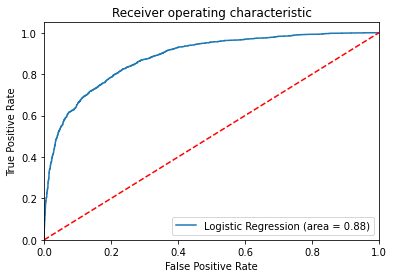

In [19]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [20]:
for i in ['MUNICIPAL POLICE_GOOD', 'CITIZEN SECURITY IN THE CITY AS A WHOLE_GOOD', 'BCN_over_barri_future', 
          'Gender', 'Barri_transport_GOOD']:
    del os_data_x[i]

In [21]:
logit_model = sm.Logit(os_data_y,os_data_x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.433186
         Iterations 7
                                      Results: Logit
Model:                  Logit                                Pseudo R-squared:   0.375    
Dependent Variable:     Would_not_stay_in_the_neighborhood   AIC:                6975.6630
Date:                   2021-04-15 21:29                     BIC:                7282.8238
No. Observations:       7950                                 Log-Likelihood:     -3443.8  
Df Model:               43                                   LL-Null:            -5510.5  
Df Residuals:           7906                                 LLR p-value:        0.0000   
Converged:              1.0000                               Scale:              1.0000   
No. Iterations:         7.0000                                                            
------------------------------------------------------------------------------------------
                          

In [22]:
result.pvalues.sort_values(ascending=False)

Living_alone                                  4.203236e-02
House_size_> 150 M2                           2.328316e-02
ASPHALT AND STREET CONSERVATION_GOOD          2.286665e-02
GREEN AREAS_GOOD                              2.155480e-02
Barri_transport_NORMAL                        1.538595e-02
House_size_< 50 M2                            8.304233e-03
STREETS CLEANING_GOOD                         7.380443e-03
Monthly_family_income_> 3000 EUROS            4.512150e-03
Barri_satisfaction_of_living_SATISFIED        1.943124e-03
CIRCULATION_GOOD                              7.542893e-04
PUBLIC LIGHTING_GOOD                          6.461190e-04
BUS_GOOD                                      4.827889e-04
BCN_over_barri_transport                      1.491051e-04
Barri_comparison_ONE OF THE WORST             1.389451e-04
Social_class_MIDDLE-MIDDLE                    1.235845e-04
Barri_evolution_IT IS THE SAME                8.382358e-05
Social_class_MIDDLE-HIGH                      4.810323e-

In [23]:
print(result.get_margeff().summary())

                Logit Marginal Effects               
Dep. Variable:     Would_not_stay_in_the_neighborhood
Method:                                          dydx
At:                                           overall
                                               dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Owns_a_car                                    0.0612      0.010      6.176      0.000       0.042       0.081
Living_alone                                  0.0227      0.011      2.035      0.042       0.001       0.045
BCN_over_barri_evolution                     -0.1012      0.017     -6.025      0.000      -0.134      -0.068
BCN_over_barri_satisfaction_of_living         0.1105      0.021      5.383      0.000       0.070       0.151
BCN_over_barri_transport                      0.0581      0.015      3.805      0.000       0.028       0.088
NOM_DISTRICTE_

In [24]:
result.pred_table()

array([[3159.,  816.],
       [ 812., 3163.]])

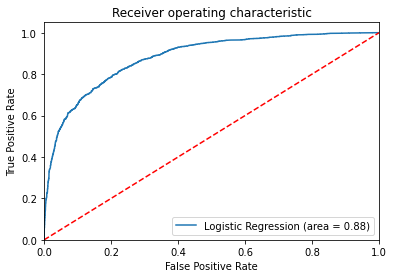

In [25]:
logit_roc_auc = roc_auc_score(os_data_y, result.predict(os_data_x))
fpr, tpr, thresholds = roc_curve(os_data_y, result.predict(os_data_x))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()